In [1]:
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import time

In [2]:
def fetch_faculty():
    url = 'https://www.aalto.fi/en/department-of-computer-science/faculty-members'
    print(f'Scraping names of Aalto CS faculty members from {url}')
    response = requests.request('GET', url)
    if response.status_code!=200:
        return None
    html = response.text
    l = []

    restree = lxml_html.fromstring(hack_html(html))
    tree    = lxml_etree.ElementTree(restree)
    for a in restree.xpath("//a[@class='aalto-profile-card__name-link']"):
        n = a.text.strip()
        if n not in l:
            l.append(n)
    return l

In [3]:
def hack_html(html):
    p = html.find('\n')
    if p>0:
        html = '<?xml version="1.0"?>'+html[p:]
    return html


In [4]:
import requests
import os
from lxml import html  as lxml_html
from lxml import etree as lxml_etree
import numpy as np

people = fetch_faculty()

fundingval = np.zeros(len(people))
cntr=0
for p in people: 
    print(p)
    # Extract first name and last name
    name_parts = p.split()
    # Take the first two parts as first name and last name
    first_name = name_parts[0]
    last_name = name_parts[-1] # ' '.join(name_parts[1:])
# Construct the URL with the updated first name and last name
    url = f"https://akareport.aka.fi/ibi_apps/WFServlet?ekaLataus=0&IBIF_ex=x_RahPaatYht_report2&UILANG=en&SANAHAKU=&ETUNIMI={first_name}&SUKUNIMI={last_name}&SUKUPUOLI=FOC_NONE&HAKU=FOC_NONE&ORGANIS=FOC_NONE&TUTKDI=FOC_NONE&TMK=FOC_NONE&PAATVUOSI_A=2001&PAATVUOSI_L=2023&LAJITTELU=PAATOS&TULOSTE=HTML"
    response = requests.get(url) #"https://akareport.aka.fi/ibi_apps/WFServlet?ekaLataus=0&IBIF_ex=x_RahPaatYht_report2&UILANG=en&SANAHAKU=&ETUNIMI=Alex&SUKUNIMI=Jung&SUKUPUOLI=FOC_NONE&HAKU=FOC_NONE&ORGANIS=FOC_NONE&TUTKDI=FOC_NONE&TMK=FOC_NONE&PAATVUOSI_A=2011&PAATVUOSI_L=2023&LAJITTELU=PAATOS&TULOSTE=HTML")  
    soup = BeautifulSoup(response.content, 'html.parser')
    # Find all <td> elements with the specified attributes
    td_elements = soup.find_all('td', {'align': 'RIGHT', 'class': 'riviots7', 'nowrap': ''})
    tmp = 0 
    for td_element in td_elements:
            # Extract the text content of the <td> element
            td_text = td_element.text.strip()
            tmp = tmp + float(td_text.replace(' ', ''))
    fundingval[cntr]= tmp
    cntr= cntr+1

Scraping names of Aalto CS faculty members from https://www.aalto.fi/en/department-of-computer-science/faculty-members
Tuomas Aura
Chris Brzuska
Parinya Chalermsook
Stephane Deny
Mario Di Francesco
Fabian Fagerholm
Vikas Kumar Garg
Christian Guckelsberger
Petter Holme
Eero Hyvönen
Perttu Hämäläinen
Alex Jung
Juho Kannala
Petteri Kaski
Samuel Kaski
Sándor Kisfaludi-Bak
Maarit Korpi-Lagg
Juhi Kulshrestha
Russell W. F. Lai
Jouko Lampinen
Casper Lassenius
Jaakko Lehtinen
Janne Lindqvist
Harri Lähdesmäki
Lauri Malmi
Heikki Mannila
Pekka Marttinen
Ilkka Niemelä
Marko Nieminen
Pekka Orponen
Alexandru Paler
Jussi Rintanen
Juho Rousu
Jari Saramäki
Arno Solin
Jukka Suomela
Linh Truong
Jara Joel Olavi Uitto
Aki Vehtari
Johanna Viitanen
Petri Vuorimaa
Robin Welsch
Antti Ylä-Jääski
Bo Zhao
Mikko Kiviharju
Tero Ilmari Ojanperä
Nitin Sawhney
Talayeh Aledavood
Lachlan Gunn
Lassi Haaranen
Arto Hellas
Vesa Hirvisalo
Jaakko Hollmen
Wilhelmiina Hämäläinen
Tommi Junttila
Barbara Esther Keller
Ari Korhonen


Text(0.5, 1.0, 'Distribution of Tax-Payer Money via Research Council of Finland')

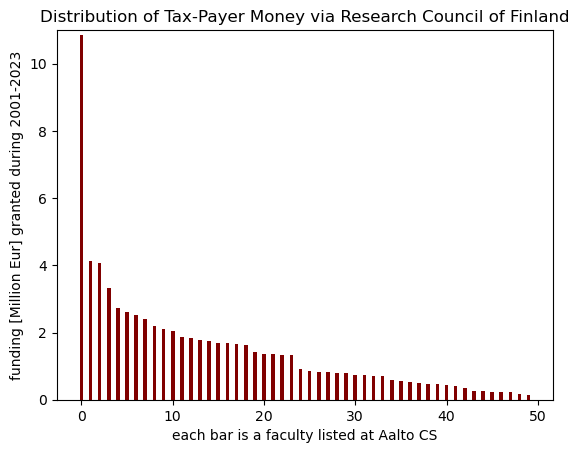

In [5]:
import matplotlib.pyplot as plt 

fundingsums = np.flip(np.sort(fundingval))
fundingsums = fundingsums[0:50] 

plt.bar(range(len(fundingsums)),fundingsums/1e06, color ='maroon', 
        width = 0.4)
plt.ylim(0,11)

plt.xlabel("each bar is a faculty listed at Aalto CS")
plt.ylabel("funding [Million Eur] granted during 2001-2023")
plt.title("Distribution of Tax-Payer Money via Research Council of Finland")
#plt.title("Distribution of AoF gits in fields Applied mathematics, Computational data analysis, Computational science, Computer engineering, computer architecture, Computer science, Information systems science, Signal processing, Systems biology, bioinformatics")